In [86]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import matplotlib as mpl


In [87]:
pip install scikit-learn==0.24.2


**importing the csv files

In [88]:
data_accepted = pd.read_csv("accepted_2007_to_2018Q4.csv", low_memory=False)

In [89]:
data_rejected = pd.read_csv("rejected_2007_to_2018Q4.csv", low_memory=False)

In [90]:
# To display the entire rows without truncation
pd.set_option('display.max_rows', 100)

# Data analysis

In [91]:
df_accepted = data_accepted

In [92]:
df_rejected = data_rejected

In [93]:
df_accepted.shape

(28523, 151)

In [94]:
df_rejected.shape

(302347, 9)

In [95]:
df_accepted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28523 entries, 0 to 28522
Columns: 151 entries, id to settlement_term
dtypes: float64(114), int64(1), object(36)
memory usage: 32.9+ MB


In [96]:
df_rejected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302347 entries, 0 to 302346
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Amount Requested      302347 non-null  float64
 1   Application Date      302347 non-null  object 
 2   Loan Title            302335 non-null  object 
 3   Risk_Score            283032 non-null  float64
 4   Debt-To-Income Ratio  302346 non-null  object 
 5   Zip Code              302325 non-null  object 
 6   State                 302325 non-null  object 
 7   Employment Length     298921 non-null  object 
 8   Policy Code           302346 non-null  float64
dtypes: float64(3), object(6)
memory usage: 20.8+ MB


In [97]:
df_accepted.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,...,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,...,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,...,218418.0,18696.0,6200.0,14877.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,...,381215.0,52226.0,62500.0,18000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,...,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_accepted.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

In [14]:
#find total no of not null values for each column
df_accepted.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18237 entries, 0 to 18236
Data columns (total 151 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          18237 non-null  int64  
 1   member_id                                   0 non-null      float64
 2   loan_amnt                                   18237 non-null  float64
 3   funded_amnt                                 18237 non-null  float64
 4   funded_amnt_inv                             18237 non-null  float64
 5   term                                        18237 non-null  object 
 6   int_rate                                    18237 non-null  float64
 7   installment                                 18237 non-null  float64
 8   grade                                       18237 non-null  object 
 9   sub_grade                                   18237 non-null  object 
 10  emp_title

In [15]:
# statistical summary of data set 
df_accepted.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,...,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,1.823700e+04,0.0,18237.000000,18237.000000,18237.000000,18237.000000,18237.000000,1.823700e+04,18236.000000,18237.000000,18237.000000,18237.000000,18237.000000,9458.000000,3293.000000,18237.000000,18237.000000,18237.000000,18229.000000,18237.000000,18237.000000,18237.000000,18237.000000,18237.000000,18237.000000,18237.000000,18237.000000,18237.000000,18237.000000,18237.000000,18237.000000,18237.000000,18237.000000,5270.000000,18237.0,129.000000,129.000000,18237.000000,18237.000000,1.823700e+04,...,18236.000000,18236.000000,18236.000000,18236.000000,18236.000000,17438.000000,18236.000000,18236.000000,18236.000000,18236.000000,18050.000000,18236.000000,18236.000000,1.823600e+04,18236.000000,18236.000000,18236.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,152.0,152.000000,152.0,152.000000,121.000000,152.000000,152.000000,520.000000,520.000000,520.000000
mean,6.770114e+07,NaN,15049.326918,15049.326918,15044.146515,12.248535,437.620497,7.826370e+04,19.389228,0.337227,695.113231,699.113341,0.615671,34.087968,65.543274,12.173603,0.238745,17390.660306,51.381919,25.632231,980.697668,980.301587,15088.267813,15083.234572,12118.028958,2739.497569,2.078292,228.662985,40.694416,4295.191793,678.168339,662.578549,0.023414,44.531879,1.0,113474.089612,18.978140,0.004825,278.665570,1.439973e+05,...,8.859125,8.537344,14.826278,5.754277,12.124698,0.000459,0.003235,0.089164,2.285370,94.000483,44.273745,0.133637,0.069752,1.794778e+05,53876.111263,22919.360934,45840.541402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,130.754145,3.0,14.006579,392.722066,10699.853750,181.722500,4970.487538,47.172115,13.869231
std,1.971239e+06,NaN,8730.050841,8730.050841,8725.534613,4.200916,249.657115,6.070455e+04,11.469439,0.890841,31.157076,31.157605,0.893643,21.821565,23.782218,5.766706,0.649147,22422.676234,24.172703,12.188421,3004.591477,3003.289232,9781.148028,9776.515642,8385.690036,2758.998395,13.333353,979.985275,175.831816,6506.755082,79.279686,126.653988,0.161392,21.504408,0.0,53214.036636,7.373833,0.071633,2241.159796,1.549460e+05,...,7.589745,4.804677,8.349415,3.343049,5.749713,0.023943,0.057747,0.503730,1.923787,8.770987,36.129662,0.382029,0.451745,1.727364e+05,49551.646271,22584.731772,44975.844782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,111.178232,0.0,10.038665,327.919908,6714.500045,183.455917,3602.736559,5.271692,7.449652
min,3.617740e+05,NaN,1000.000000,1000.000000,1000.000000,5.320000,30.540000,0.000000e+00,0.000000,0.000000,660.000000,664.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [16]:
df_rejected.describe()

,Amount Requested,Risk_Score,Policy Code
count,2.053830e+05,188483.000000,205382.0
mean,1.052030e+04,579.580482,0.0
std,8.622360e+03,186.462552,0.0
min,5.000000e+02,0.000000,0.0
25%,4.000000e+03,539.000000,0.0
50%,8.000000e+03,637.000000,0.0
75%,1.500000e+04,687.000000,0.0
max,1.400000e+06,849.000000,0.0


**Checking duplicate rows in data set

In [17]:
duplicate_rows=df_accepted[df_accepted.duplicated()]

In [18]:
duplicate_rows

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,...,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


There are no duplicate rows in the dataset

# Missing values 

In [19]:
#Check percentage of missing values for each attribute 
# And sort them in descending order
missing_value = df_accepted.isnull().mean().sort_values(ascending=False)*100


In [20]:
missing_value

sec_app_num_rev_accts      100.0
sec_app_fico_range_high    100.0
sec_app_inq_last_6mths     100.0
sec_app_mort_acc           100.0
sec_app_open_acc           100.0
                           ...  
total_acc                    0.0
revol_bal                    0.0
pub_rec                      0.0
open_acc                     0.0
id                           0.0
Length: 151, dtype: float64

**Delete columns with at least 30 % null values.
   <i> Below we calculate threshold value that is 70 % of the total no of columns</i>

In [21]:
threshold = len(df_accepted)*0.7
threshold

12765.9

In [22]:
# It will only retain all those columns that contain atleast 70 % non null values
# Or we can say it will delete all those columns that contain at least 30% null values
df_accepted.dropna(thresh=threshold, axis=1,inplace=True)

# we can also use the function
# <b>data.drop(labels=drop_columns, axis=1, inplace=True)</b>

we observe that 58 columns have been dropped

In [23]:
df_accepted.shape


(18237, 107)

In [24]:
df_accepted.isnull().sum()

id                            0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
                             ..
total_bc_limit                1
total_il_high_credit_limit    1
hardship_flag                 1
disbursement_method           1
debt_settlement_flag          1
Length: 107, dtype: int64

Missing values visualisation using bar graph

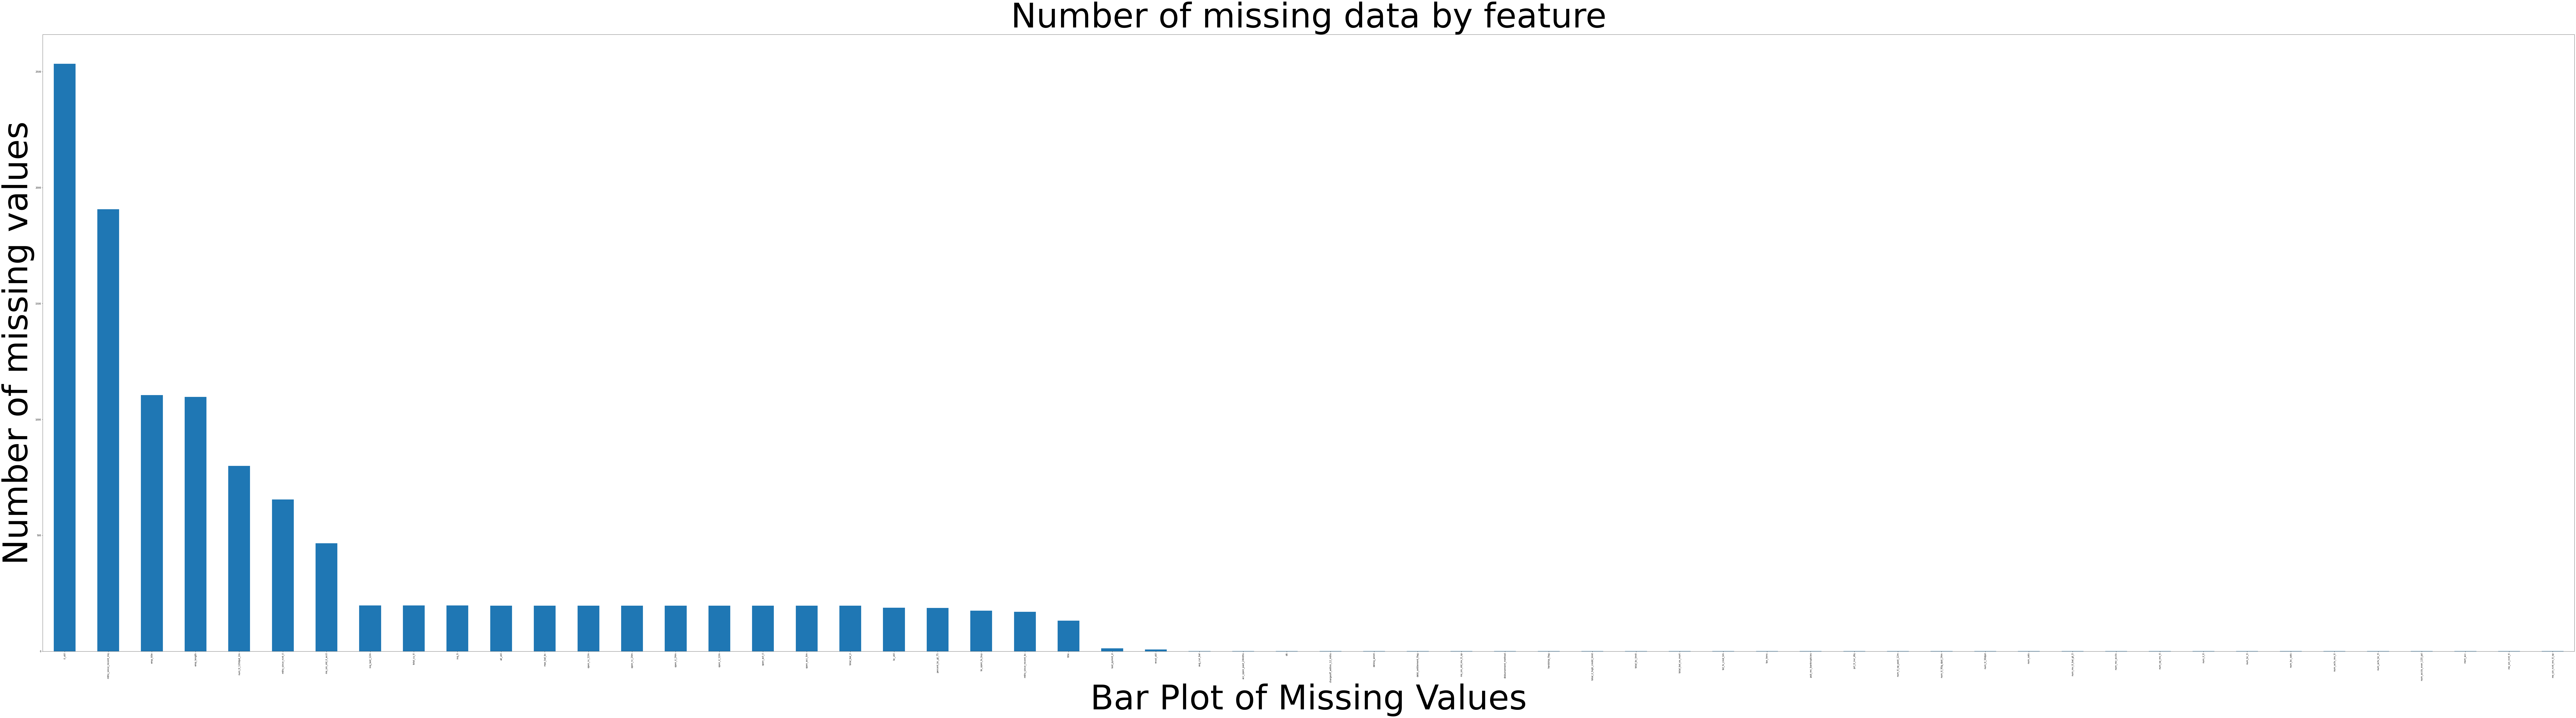

In [25]:
plt.figure(figsize=(200,50))
missing= df_accepted.isnull().sum()
missing= missing[missing > 0]
missing.sort_values(ascending= False, inplace=True)
plt.xlabel("Bar Plot of Missing Values", fontsize=150)
plt.ylabel("Number of missing values", fontsize=150)
plt.title("Number of missing data by feature", fontsize=150)
missing.plot(kind="bar")
plt.show()


### Now we exclude those columns that are irrelevant for us.

In [26]:
drop_attributes = ['id', 'funded_amnt', 'funded_amnt_inv', 'verification_status', 'issue_d', 'pymnt_plan', 'url', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_credit_pull_d', 'policy_code', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'hardship_flag']
len(drop_attributes)

60

There are 60 columns that we do not need

In [27]:
#code to drop the unwanted attributes
pd.options.mode.chained_assignment = None
df_accepted.drop(labels=drop_attributes, axis=1, inplace=True)

In [28]:
df_accepted.shape

(18237, 47)

## Loan status
**Now we will analyse the loan status.
    we analyse two categories for loan_status i.e 'Fully_paid' and 'Charged_off (defaulters)" to predict the risk of loan
    repayment for the lending club.

In [29]:
df_accepted['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)'], dtype=object)

In [30]:
df_accepted['loan_status'].value_counts(dropna=False)

Fully Paid            12946
Charged Off            3229
Current                1921
Late (31-120 days)       96
In Grace Period          38
Late (16-30 days)         7
Name: loan_status, dtype: int64

In [31]:
# We only want values for "Fully Paid" and "Charged Off"
df_accepted = df_accepted.loc[df_accepted['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [32]:
loan=df_accepted['loan_status'].value_counts(dropna=False)

In [33]:
df_accepted.shape

(16175, 47)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Frequency Distribuition- Loan Amount')

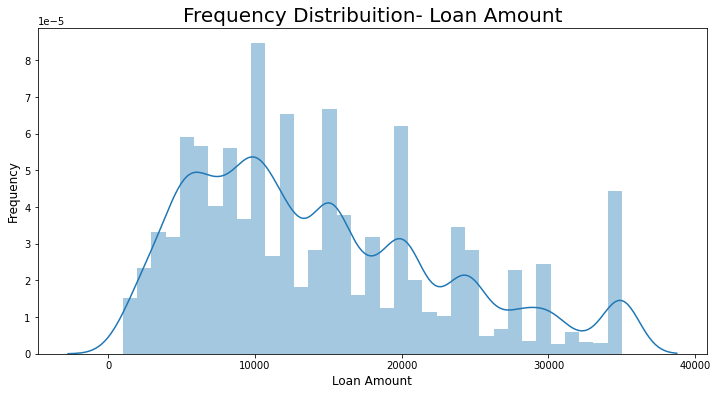

In [34]:
# Frequency distribution of Loan Amount
plt.figure(figsize=(12,6))
g = sbn.distplot(df_accepted["loan_amnt"])
g.set_xlabel("Loan Amount", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Frequency Distribuition- Loan Amount", fontsize=20)

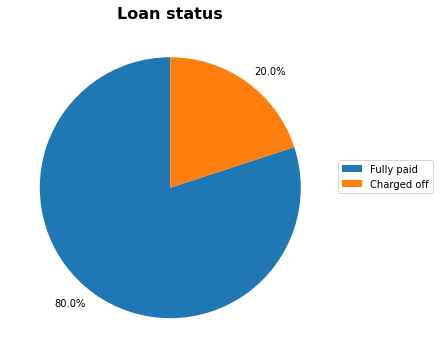

In [35]:
chargeoffrate = df_accepted['loan_status'].value_counts(normalize=True,dropna=False)
#creating the labels for the chart:
labels = []
for i in chargeoffrate:
    labels.append(str(round(i*100,0))+"%")

# Creating the pie chart
plt.figure(figsize=(12,6))
plt.title('Loan status', fontsize=16, fontweight='bold');
plt.pie(chargeoffrate,labels=labels,startangle=90);
plt.legend(['Fully paid','Charged off'], loc='best', bbox_to_anchor=(1, 0.6));

Text(0.5, 0, 'Count')

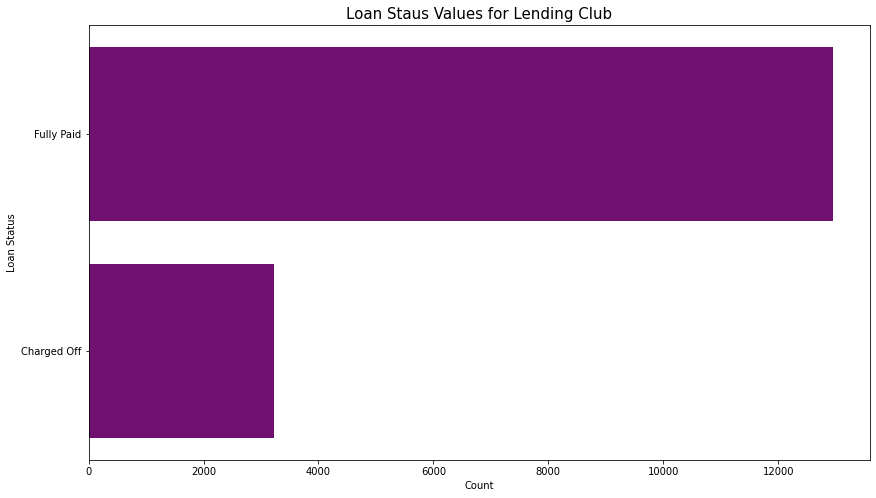

In [36]:
plt.figure(figsize=(14,8))
sbn.barplot(y = loan.index, x = loan,color = 'purple')
plt.title('Loan Staus Values for Lending Club',fontsize=15)
plt.ylabel('Loan Status', fontsize=10)
plt.xlabel('Count',fontsize=10)

In [37]:
df_accepted["loan_amnt"].describe()


count    16175.000000
mean     14385.672334
std       8670.627193
min       1000.000000
25%       7550.000000
50%      12000.000000
75%      20000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [38]:
#We observe lending club have not provided loan more than 40000 dollars.

In [39]:
df_accepted["loan_status"][df_accepted["loan_amnt"]>40000].value_counts()

Series([], Name: loan_status, dtype: int64)

In [40]:
pd.pivot_table(df_accepted, index='loan_status', aggfunc='mean')

,acc_now_delinq,all_util,annual_inc,chargeoff_within_12_mths,collection_recovery_fee,collections_12_mths_ex_med,dti,fico_range_high,fico_range_low,il_util,inq_fi,inq_last_12m,installment,int_rate,last_fico_range_high,last_fico_range_low,last_pymnt_amnt,loan_amnt,max_bal_bc,mths_since_rcnt_il,open_acc_6m,open_act_il,open_il_12m,open_il_24m,open_rv_12m,open_rv_24m,pub_rec,recoveries,total_bal_il,total_cu_tl
loan_status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Charged Off,0.003716,63.935069,70912.203184,0.008674,229.837119,0.028801,21.264868,690.427687,686.427687,74.245477,1.188265,2.697835,459.648225,14.609015,562.301641,498.669867,457.551669,15738.161970,5229.933814,17.809709,1.358532,3.021644,0.946675,2.007842,1.677854,3.617001,0.267885,1291.46078,37139.303325,1.545654
Fully Paid,0.005175,59.437807,79184.734736,0.008342,0.000000,0.023791,18.639747,701.088058,697.087904,70.988449,0.882321,2.155502,425.843019,11.368901,704.928240,699.589835,5851.476442,14048.333462,5858.170553,21.776053,1.085705,2.821181,0.722062,1.587850,1.369726,2.898932,0.238993,0.00000,34997.637370,1.544958


In [41]:
df_accepted.shape

(16175, 47)

## Grade

In [42]:
df_accepted['grade'].unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G'], dtype=object)

In [43]:
np.sort(df_accepted['sub_grade'].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

In [44]:
df_accepted.head().T

,0,1,2,4,5
loan_amnt,3600,24700,20000,10400,11950
term,36 months,36 months,60 months,60 months,36 months
int_rate,13.99,11.99,10.78,22.45,13.44
installment,123.03,820.28,432.66,289.91,405.18
grade,C,C,B,F,C
sub_grade,C4,C1,B4,F1,C3
emp_title,leadman,Engineer,truck driver,Contract Specialist,Veterinary Tecnician
emp_length,10+ years,10+ years,10+ years,3 years,4 years
home_ownership,MORTGAGE,MORTGAGE,MORTGAGE,MORTGAGE,RENT
annual_inc,55000,65000,63000,104433,34000


In [45]:
df_accepted["sub_grade"].value_counts()

C1    1121
B4    1101
B3    1069
B5    1031
B2     993
C2     966
C4     927
B1     908
C3     863
A5     840
A1     708
C5     696
A4     573
D1     563
A2     485
A3     478
D2     468
D3     400
D4     381
D5     288
E1     244
E2     217
E3     200
E4     154
E5     134
F1      91
F2      86
F3      64
F5      32
F4      29
G2      24
G1      17
G3      11
G5       7
G4       6
Name: sub_grade, dtype: int64

Text(0.5, 0, 'Count')

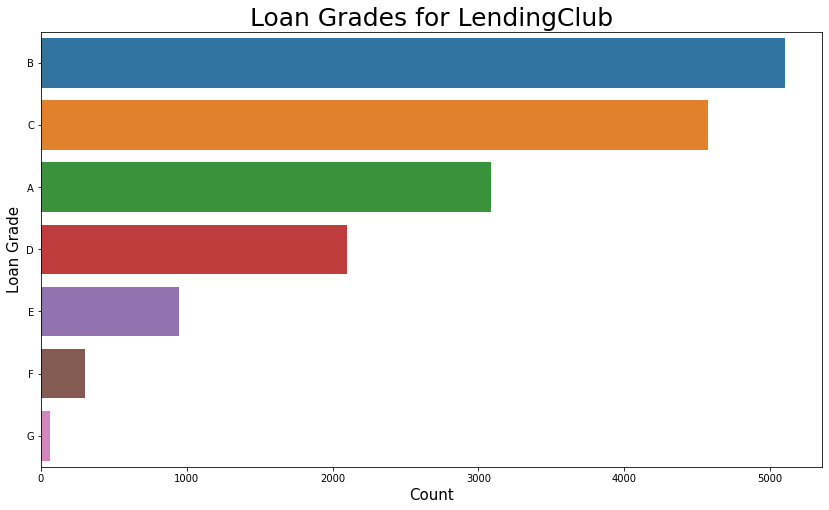

In [46]:
# Set a new variable for the purpose of displaying the value counts of 'grade'
grade_vis = df_accepted['grade'].value_counts()

# Plot the value counts
plt.figure(figsize=(14,8))

sbn.barplot(y=grade_vis.index, x=grade_vis)
plt.title('Loan Grades for LendingClub', fontsize=25)
plt.ylabel('Loan Grade', fontsize=15)
plt.xlabel('Count', fontsize=15)

### Interest rate for customers

In [47]:
df_accepted["int_rate"].describe()


count    16175.000000
mean        12.015722
std          4.183605
min          5.320000
25%          9.170000
50%         11.480000
75%         14.480000
max         28.990000
Name: int_rate, dtype: float64

In [48]:
df_accepted["int_rate"].describe()

count    16175.000000
mean        12.015722
std          4.183605
min          5.320000
25%          9.170000
50%         11.480000
75%         14.480000
max         28.990000
Name: int_rate, dtype: float64

In [49]:
pd.pivot_table(df_accepted, index='loan_status', values="int_rate", aggfunc='mean')


,int_rate
loan_status,
Charged Off,14.609015
Fully Paid,11.368901


From above we observe that charged off customers have to paymore interset than the fully paid customers

In [50]:
#comparing avg interest rate with the grade for customers
pd.pivot_table(df_accepted, index='loan_status',columns="grade", values="int_rate", aggfunc='mean')

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,7.134789,10.108370,13.277960,16.902270,19.444964,23.618333,27.623784
Fully Paid,6.795887,9.895542,13.103248,16.748272,19.394547,23.421974,27.580000


In [51]:
X1 = df_accepted.groupby(["grade"])["int_rate"].mean().index
Y1 = df_accepted.groupby(["grade"])["int_rate"].mean().values

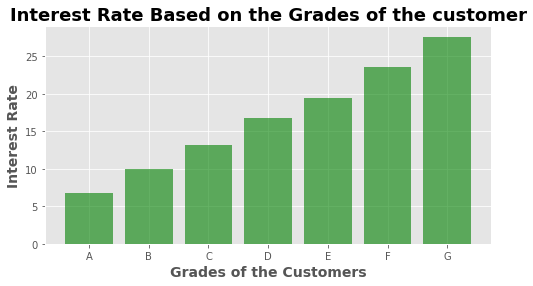

In [52]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(8,4))
plt.bar(X1, Y1, color='green', alpha=0.60)
plt.title('Interest Rate Based on the Grades of the customer',fontsize=18, fontweight='bold')
plt.xlabel("Grades of the Customers", fontsize=14.0, fontweight='bold')
plt.ylabel("Interest Rate", fontsize=14.0, fontweight='bold')
plt.show()

In [53]:
X2 = df_accepted.groupby(["sub_grade"])["int_rate"].mean().index
Y2 = df_accepted.groupby(["sub_grade"])["int_rate"].mean().values

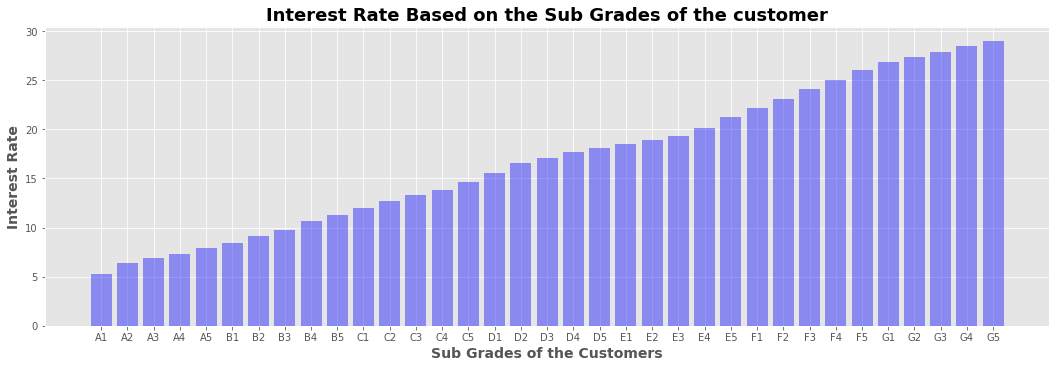

In [54]:
plt.style.use('ggplot')
f, ax = plt.subplots(figsize=(18,5.5)) #set the size that you'd like (width, height)
plt.bar(X2, Y2, color='blue', alpha=0.40)
plt.title('Interest Rate Based on the Sub Grades of the customer',fontsize=18, fontweight='bold')
plt.xlabel("Sub Grades of the Customers", fontsize=14.0, fontweight='bold')
plt.ylabel("Interest Rate", fontsize=14.0, fontweight='bold')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


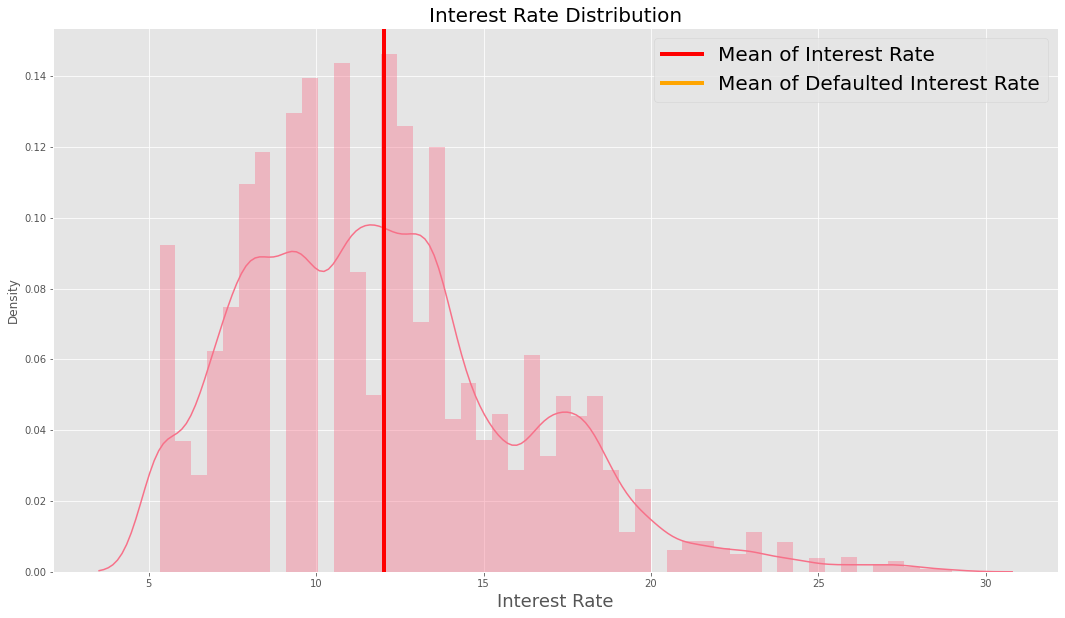

In [55]:

# Set new variable name to include only loans that are defaulted
default_vis = df_accepted[df_accepted.loan_status == 'Default']

# Visualize the distribution of interest rates
sbn.set_palette("husl")
plt.figure(figsize=(18,10))
sbn.distplot(df_accepted['int_rate'], hist='density')
plt.axvline(x=df_accepted.int_rate.mean(), color='red', linestyle='-', lw=4, label='Mean of Interest Rate')
plt.axvline(x=default_vis.int_rate.mean(), color='orange', linestyle='-', lw=4, label='Mean of Defaulted Interest Rate')
plt.title('Interest Rate Distribution', fontsize=20)
plt.xlabel('Interest Rate', fontsize=18)
plt.legend(fontsize=20)
plt.show()

**outliner detection using inter quartile range

In [56]:


Q1 = np.quantile(df_accepted["int_rate"],0.25)
Q3 = np.quantile(df_accepted["int_rate"],0.75)
IQR = Q3 - Q1

Low_outliers = Q1-1.5*IQR
High_outliers = Q3+1.5*IQR

print("Low_outliers :", round(Low_outliers,4))
print("High_outliers :", round(High_outliers,4))

print("Q1 :",Q1)
print("Q3 :", Q3)
print("IQR :", IQR)

Low_outliers : 1.205
High_outliers : 22.445
Q1 : 9.17
Q3 : 14.48
IQR : 5.3100000000000005


### Employment length

In [57]:
df_accepted['emp_length'].unique()

array(['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years',
       '2 years', '5 years', '9 years', '< 1 year', '1 year', nan],
      dtype=object)

In [58]:
#NOTE : We need integer values for years Therefore we need to replace the values here.

In [59]:
df_accepted['emp_length'].replace(to_replace=['10+ years', '3 years', '4 years', '6 years', '7 years', '8 years', '2 years', '5 years', '9 years', '< 1 year', '1 year'], value=[10,3,4,6,7,8,2,5,9,0,1], inplace=True)


In [60]:
df_accepted['emp_length'].value_counts()


10.0    5313
0.0     1532
2.0     1404
3.0     1320
1.0     1057
5.0     1008
4.0      918
8.0      809
6.0      662
9.0      576
7.0      570
Name: emp_length, dtype: int64

In [61]:
df_accepted['emp_length'].isnull().sum()


1006

In [62]:
df_accepted['emp_length'].mean()


5.886017535763728

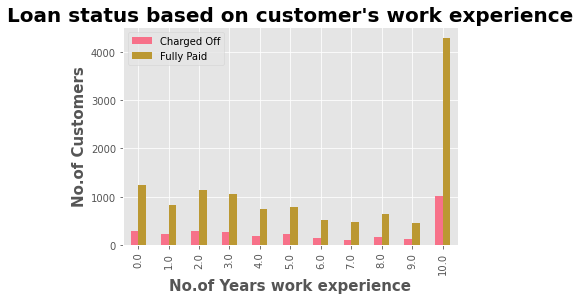

In [63]:
pd.crosstab(df_accepted["emp_length"],[df_accepted["loan_status"]]).plot(kind="bar")
plt.title("Loan status based on customer's work experience", fontsize=20.0, fontweight='bold')
plt.xlabel("No.of Years work experience", fontsize=15.0, fontweight='bold')
plt.ylabel("No.of Customers", fontsize=15, fontweight='bold')
plt.legend(loc="best")
plt.show()

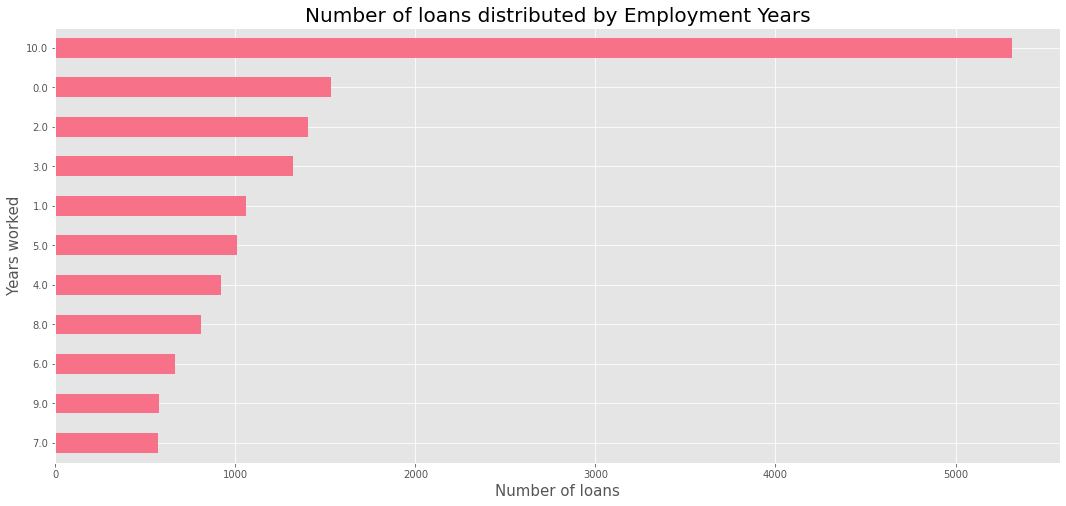

In [64]:
# Employment Length and Number of Loans
df_accepted['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

### Installments


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


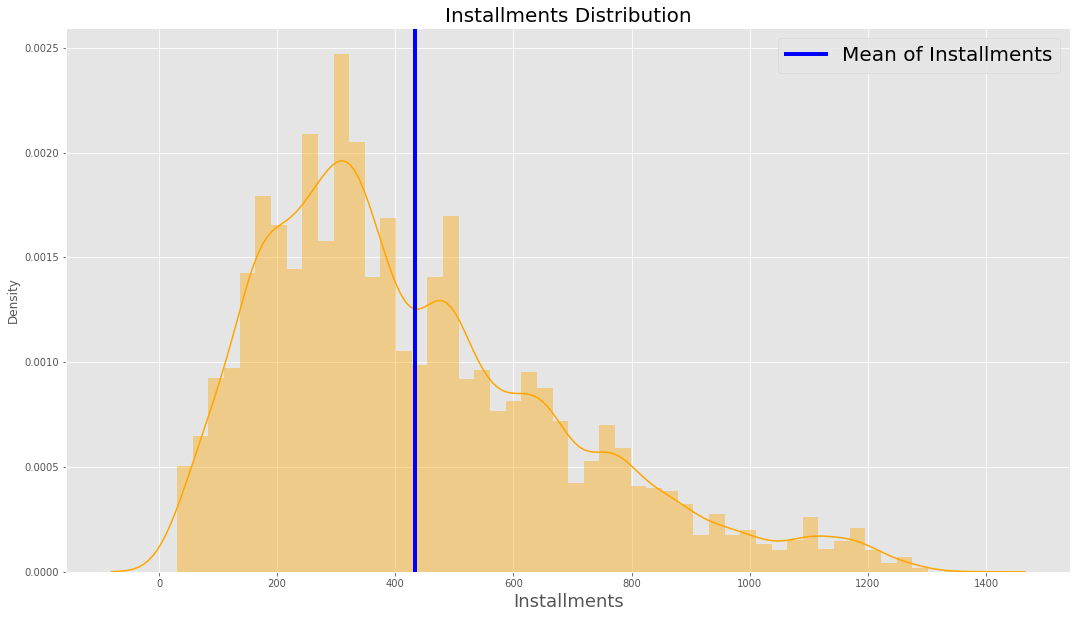

In [65]:
sbn.set_palette("husl")
plt.figure(figsize=(18,10))
sbn.distplot(df_accepted['installment'], hist='density', color='orange')
plt.axvline(x=df_accepted.installment.mean(), color='blue', linestyle='-', lw=4, label='Mean of Installments')
plt.title('Installments Distribution', fontsize=20)
plt.xlabel('Installments', fontsize=18)
plt.legend(fontsize=20)
plt.show()

### Home ownership

In [66]:
df_accepted["home_ownership"].unique()

array(['MORTGAGE', 'RENT', 'OWN'], dtype=object)

In [67]:
df_accepted["home_ownership"].value_counts()


MORTGAGE    7861
RENT        6408
OWN         1906
Name: home_ownership, dtype: int64

In [68]:

X1 = df_accepted["home_ownership"].value_counts().index
Y1 = df_accepted["home_ownership"].value_counts().values
print(X1)
print(Y1)

Index(['MORTGAGE', 'RENT', 'OWN'], dtype='object')
[7861 6408 1906]


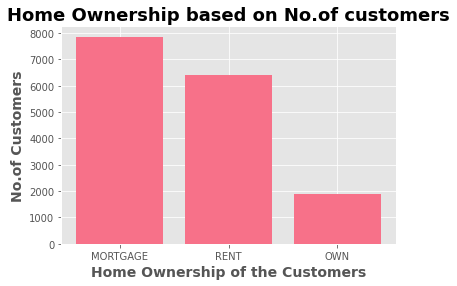

In [69]:
plt.bar(X1, Y1)
plt.title('Home Ownership based on No.of customers',fontsize=18, fontweight='bold')
plt.xlabel("Home Ownership of the Customers", fontsize=14.0, fontweight='bold')
plt.ylabel("No.of Customers", fontsize=14.0, fontweight='bold')
plt.show()


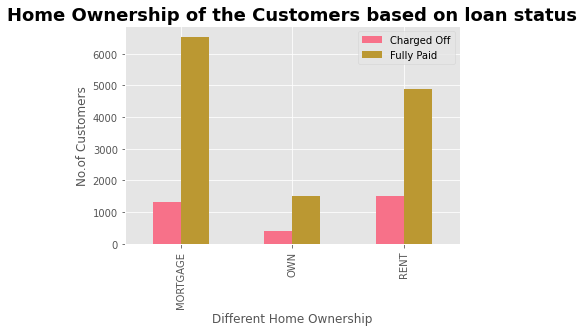

In [70]:
pd.crosstab(df_accepted["home_ownership"], df_accepted["loan_status"]).plot(kind="bar")
plt.title("Home Ownership of the Customers based on loan status", fontsize=18.0, fontweight='bold')
plt.xlabel("Different Home Ownership")
plt.ylabel("No.of Customers")
plt.legend(loc="best")
plt.show()

### Annual income

In [71]:
df_accepted['annual_inc'].describe()

count    1.617500e+04
mean     7.753330e+04
std      6.226228e+04
min      0.000000e+00
25%      4.700000e+04
50%      6.500000e+04
75%      9.360000e+04
max      3.964280e+06
Name: annual_inc, dtype: float64

In [72]:
df_accepted['log_annual_inc'] = df_accepted['annual_inc'].apply(lambda x: np.log10(x+1))


In [73]:
df_accepted['log_annual_inc'].describe()


count    16175.000000
mean         4.821695
std          0.237652
min          0.000000
25%          4.672107
50%          4.812920
75%          4.971280
max          6.598164
Name: log_annual_inc, dtype: float64

Text(0.5, 0, 'log_annual_inc')

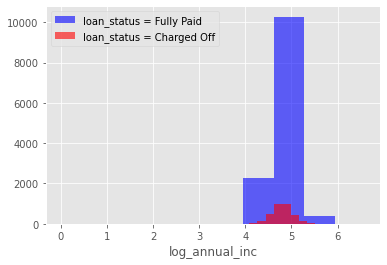

In [74]:
plt.subplot(1, 1, 1)
df_accepted[df_accepted["loan_status"] == "Fully Paid"]["log_annual_inc"].hist(bins=10, color='blue', label='loan_status = Fully Paid', alpha=0.6)
df_accepted[df_accepted["loan_status"] == "Charged Off"]["log_annual_inc"].hist(bins=10, color='red', label='loan_status = Charged Off', alpha=0.6)
plt.legend()
plt.xlabel("log_annual_inc")

In [75]:
df_accepted.groupby('loan_status')['log_annual_inc'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3229.0,4.791468,0.225628,3.903144,4.653222,4.792399,4.929424,5.698971
Fully Paid,12946.0,4.829234,0.239973,0.000000,4.681250,4.832515,4.979325,6.598164


### Other variables like zip code, issue date , purpose etc

**purpose

In [76]:
df_accepted['purpose'].value_counts()


debt_consolidation    9059
credit_card           4056
other                  948
home_improvement       939
major_purchase         353
medical                191
small_business         172
car                    161
vacation               111
moving                 102
house                   72
renewable_energy        11
Name: purpose, dtype: int64

In [77]:
df_accepted.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()


purpose
home_improvement      0.155485
vacation              0.162162
car                   0.167702
credit_card           0.168393
major_purchase        0.192635
other                 0.197257
medical               0.209424
debt_consolidation    0.217243
moving                0.225490
house                 0.277778
small_business        0.284884
Name: loan_status, dtype: float64

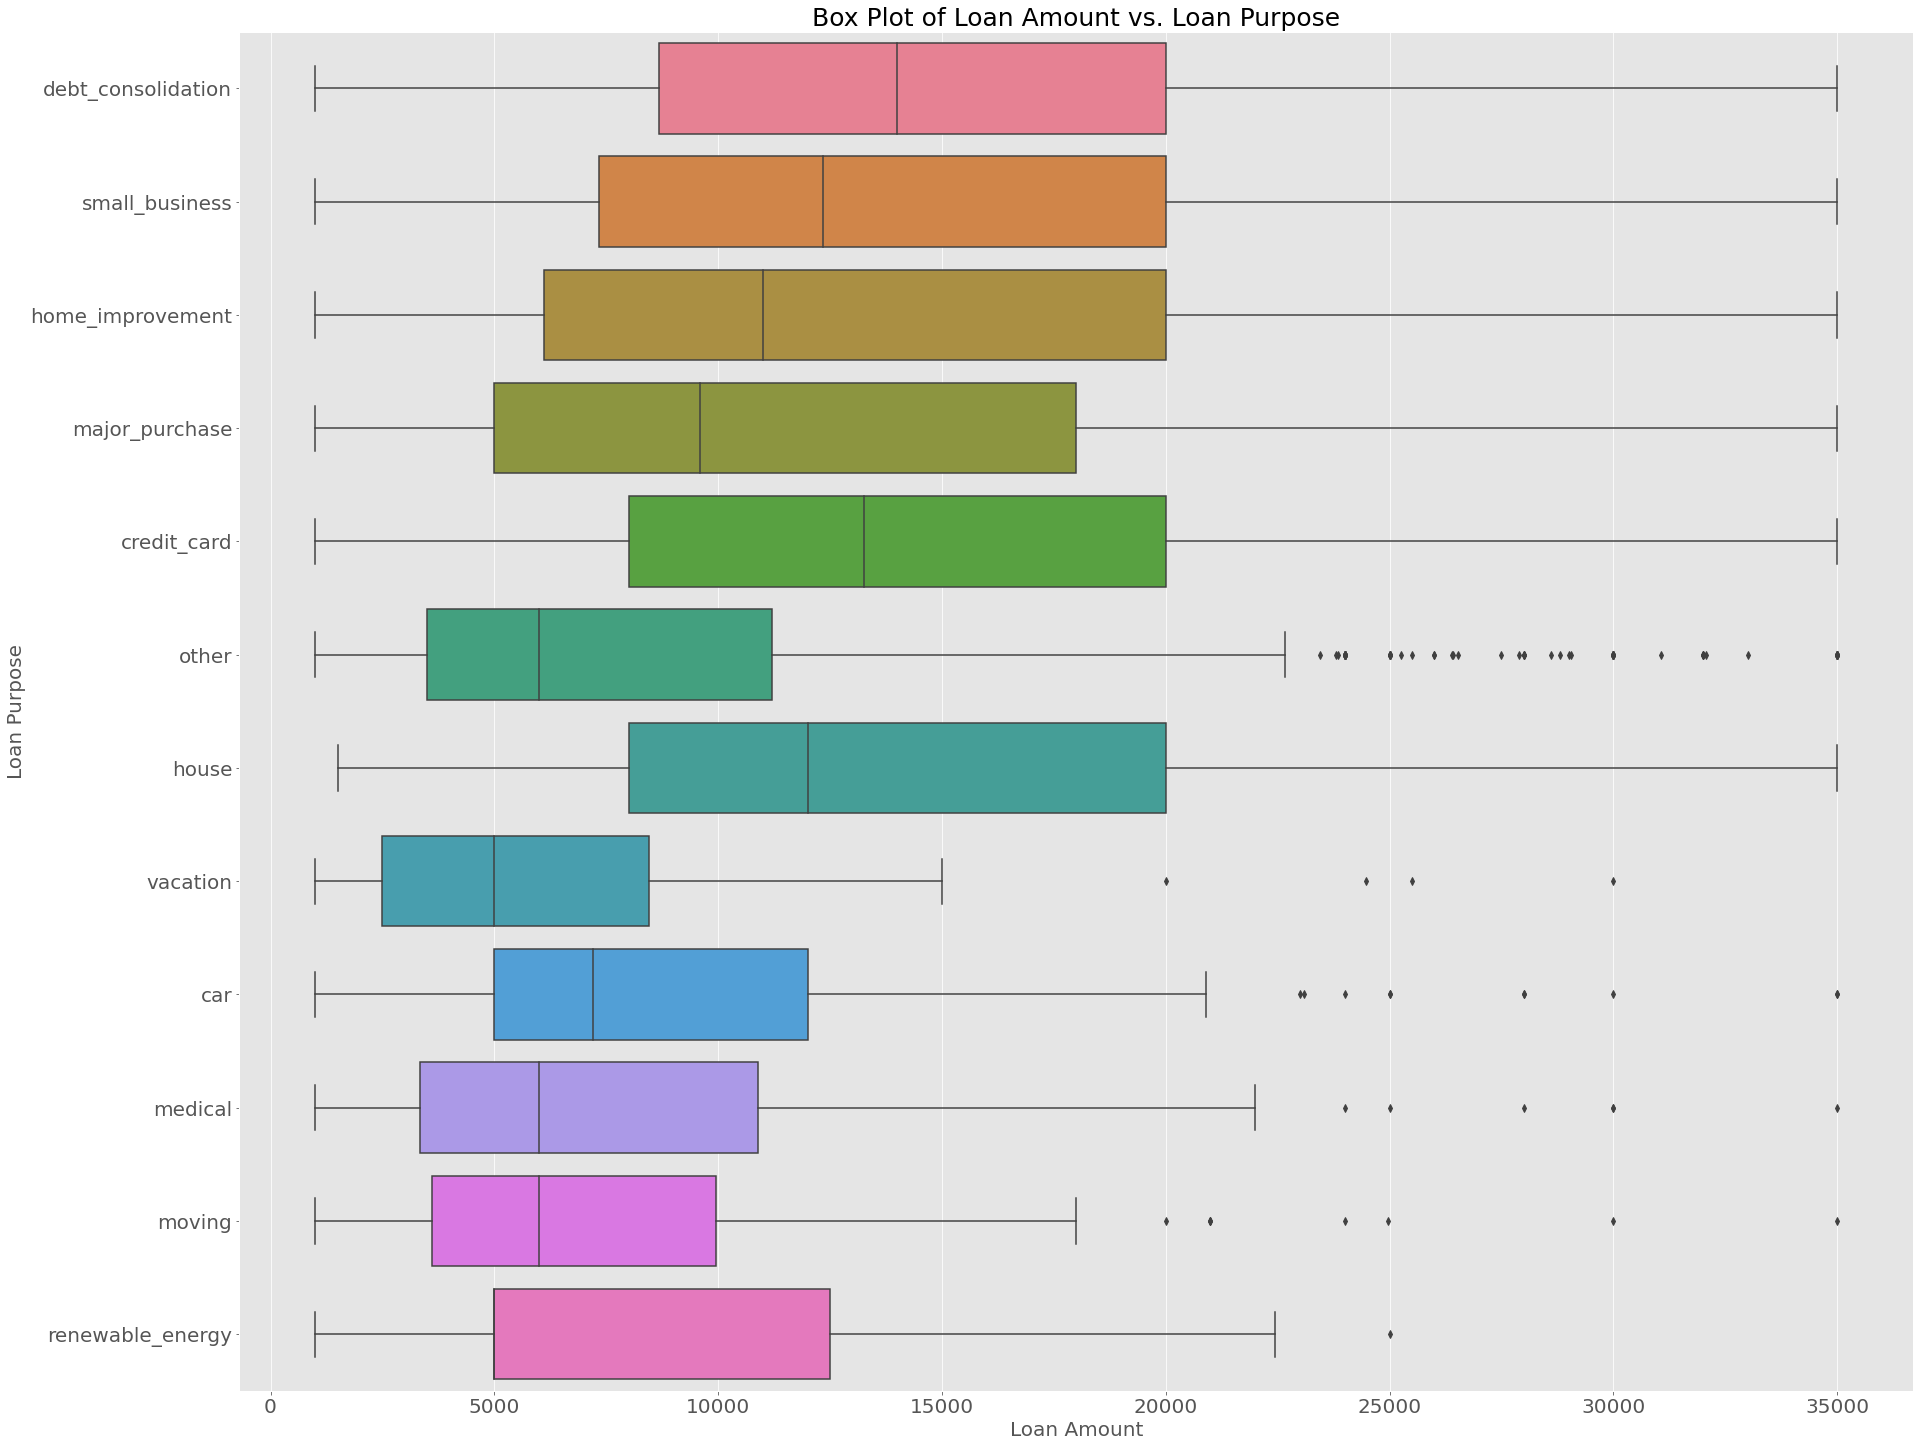

In [78]:
# Plot the borrower's Loan Amount compared to Loan Purpose
plt.figure(figsize=(30,25))
sbn.boxplot(x="loan_amnt", y="purpose", data=df_accepted, palette="husl")
plt.title('Box Plot of Loan Amount vs. Loan Purpose', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

**debt to income ratio

In [79]:
df_accepted['dti'].describe()

count    16174.000000
mean        19.163830
std         11.709447
min          0.000000
25%         12.430000
50%         18.535000
75%         25.340000
max        999.000000
Name: dti, dtype: float64

In [80]:
df_accepted.dti.value_counts()

17.44    17
18.15    15
16.30    15
9.44     15
16.03    15
         ..
37.79     1
39.80     1
0.05      1
31.79     1
2.84      1
Name: dti, Length: 3630, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Debt-to-income Ratio')

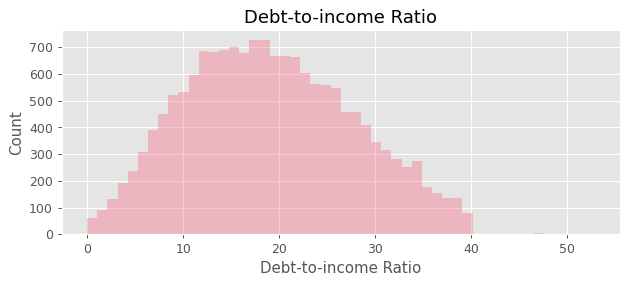

In [81]:

plt.figure(figsize=(8,3), dpi=90)
sbn.distplot(df_accepted.loc[df_accepted['dti'].notnull() & (df_accepted['dti']<60), 'dti'], kde=False)
plt.xlabel('Debt-to-income Ratio')
plt.ylabel('Count')
plt.title('Debt-to-income Ratio')

**More Preprocessing

In [98]:
df=data_accepted.copy()

In [99]:
#transform the loan-status into a binary variable where 'Charged Off' = 1 and 'Fully Paid' = 0.
df['loan_status_bin'] = df['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

In [100]:
df['annual_inc_log'] = df['annual_inc'].apply(np.log)

In [101]:
#Reduce the dataset to the following columns that will be used for the prediction.

columns = ['loan_amnt', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'annual_inc_log','loan_status_bin','dti',
       'fico_range_low', 'inq_last_6mths']
df = df[columns]

In [102]:
#Drop all rows with null values as we have sufficient amount of data
df.dropna(inplace=True)

In [103]:
df.shape

(23621, 11)

In [104]:
#converting grade from string to numeric
df['grade']=df['grade'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7})

In [105]:
# Remove string characters in 'term' column
df['term'] = df['term'].map(lambda x: x.lstrip(' ').rstrip('months'))

In [106]:
# Remove string characters in 'emp_length' column
df['emp_length'] = df['emp_length'].str.replace(r'\D', '')

In [107]:
# Change datatypes to INTs in the following columns
df.term = df.term.astype("int64") 
df.emp_length = df.emp_length.astype("int64")

In [108]:
df

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc_log,loan_status_bin,dti,fico_range_low,inq_last_6mths
0,3600.0,36,13.99,123.03,3,10,10.915088,0.0,5.91,675.0,1.0
1,24700.0,36,11.99,820.28,3,10,11.082143,0.0,16.06,715.0,4.0
2,20000.0,60,10.78,432.66,2,10,11.050890,0.0,10.78,695.0,0.0
4,10400.0,60,22.45,289.91,6,3,11.556301,0.0,25.37,695.0,3.0
5,11950.0,36,13.44,405.18,3,4,10.434116,0.0,10.20,690.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
28516,35000.0,36,8.38,1102.92,2,10,12.765688,0.0,22.54,685.0,2.0
28517,5400.0,36,9.76,173.64,2,3,10.308953,0.0,1.64,750.0,0.0
28518,9800.0,36,9.17,312.42,2,3,11.312118,0.0,20.18,670.0,0.0
28519,10000.0,36,6.24,305.31,1,10,11.002100,0.0,14.50,825.0,0.0


In [109]:
df_dummies = pd.get_dummies(df) #get dummy for categorical features

In [110]:
drop_columns = df_dummies.columns[(df_dummies.mean()<0.01)] #drop all dummy-variables which contain not at least 1% ones
df_dummies.drop(drop_columns, axis=1, inplace=True)

In [111]:
df_dummies.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc_log,loan_status_bin,dti,fico_range_low,inq_last_6mths
0,3600.0,36,13.99,123.03,3,10,10.915088,0.0,5.91,675.0,1.0
1,24700.0,36,11.99,820.28,3,10,11.082143,0.0,16.06,715.0,4.0
2,20000.0,60,10.78,432.66,2,10,11.050890,0.0,10.78,695.0,0.0
4,10400.0,60,22.45,289.91,6,3,11.556301,0.0,25.37,695.0,3.0
5,11950.0,36,13.44,405.18,3,4,10.434116,0.0,10.20,690.0,0.0


In [112]:
X = df.drop('loan_status_bin', axis=1)
y = df['loan_status_bin']

**Train and Test set

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [114]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

sc = MinMaxScaler()
sc.clip= False
clf = LogisticRegression(penalty='l1', C=0.01, solver='liblinear')

pipe_lr = Pipeline([('scaler', sc), ('clf', clf)])

In [115]:
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf',
                 LogisticRegression(C=0.01, penalty='l1', solver='liblinear'))])

In [116]:
pipe_lr.score(X_train, y_train) #accuracy rate

0.7979466553767993

ROC-AUC-score:  0.7109894020210991


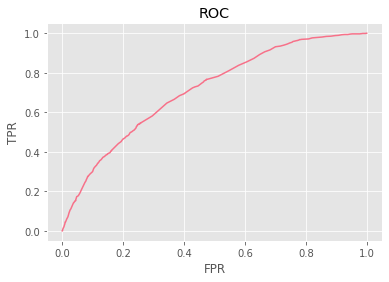

In [117]:
test_probas = pipe_lr.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

fpr, tpr, tresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr)
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')

print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

In [118]:
#Testing with LR.score:

accuracy_score(y_test, pipe_lr.predict(X_test))

0.8021164021164021